In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [5]:
df['total_spent'] = df['TV']+df['radio']+df['newspaper']

In [6]:
df.head()

,TV,radio,newspaper,sales,total_spent
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='total_spent', ylabel='sales'>

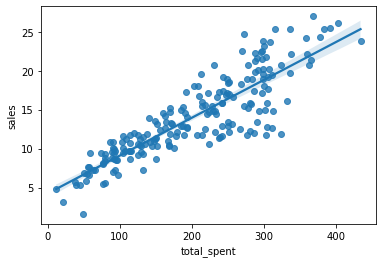

In [7]:
sns.regplot(data=df,x='total_spent',y='sales')

In [8]:
X= df['total_spent']
y= df['sales']

In [9]:
help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_

In [10]:
np.polyfit(x=X,y=y,deg=3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [11]:
potential_spend = np.linspace(0,500,100)

In [12]:
predicted_sales = 0.04868788*potential_spend + 4.24302822

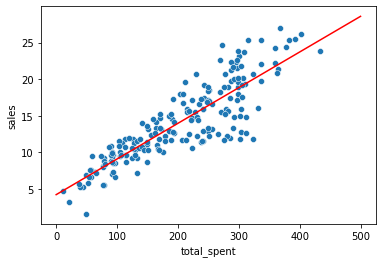

In [13]:
sns.scatterplot(x='total_spent',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color ='red')

In [14]:
 3.07615033e-07*200**3  -1.89392449e-04*200**2 + 8.20886302e-02*200+2.70495053e+00

14.007898873999997

In [15]:
pot_spend = np.linspace(0,500,100)

In [16]:
pred_sales= 3.07615033e-07*pot_spend**3  -1.89392449e-04*pot_spend**2 + 8.20886302e-02*pot_spend+2.70495053e+00

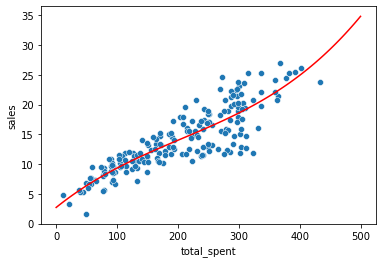

In [17]:
sns.scatterplot(x='total_spent',y='sales',data=df)
plt.plot(pot_spend,pred_sales,color='red')

In [18]:
X = df.drop('sales',axis=1)

In [19]:
X = X.drop('total_spent',axis=1)

In [20]:
y = df['sales']

In [21]:
y.shape

(200,)

In [22]:
from sklearn.model_selection import train_test_split


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |    

In [26]:
model = LinearRegression()

In [27]:
model.fit(X,y)

LinearRegression()

In [28]:
test_predictions =model.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [30]:
df['sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

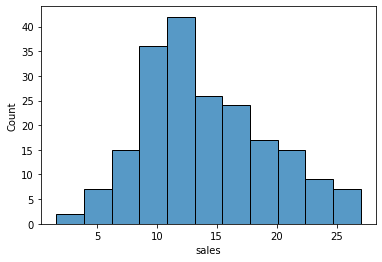

In [31]:
sns.histplot(data=df,x='sales')

In [32]:
mean_absolute_error(y_test,test_predictions)

1.2031461608073124

In [33]:
np.sqrt(mean_squared_error(y_test,test_predictions))

1.4948861203847446

In [34]:
test_residuals = y_test -test_predictions

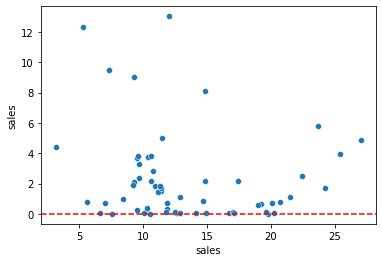

In [35]:
sns.scatterplot(x=y_test,y=test_residuals**2,)
plt.axhline(y=0,color='red',ls='--')

<AxesSubplot:xlabel='sales', ylabel='Count'>

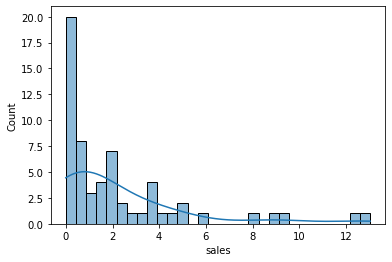

In [36]:
sns.histplot(x=test_residuals**2,bins=30,kde=True)

In [40]:
#should be random distributed to zero

In [41]:
import scipy as sp

((array([-2.27390067, -1.91302992, -1.70135682, -1.54640086, -1.42160977,
         -1.31571014, -1.2228056 , -1.13940346, -1.06325419, -0.99281837,
         -0.92699283, -0.86495764, -0.80608503, -0.74988229, -0.69595441,
         -0.64397882, -0.5936878 , -0.54485575, -0.49729007, -0.45082415,
         -0.40531215, -0.36062492, -0.31664678, -0.27327293, -0.23040741,
         -0.18796131, -0.14585132, -0.10399849, -0.06232713, -0.02076376,
          0.02076376,  0.06232713,  0.10399849,  0.14585132,  0.18796131,
          0.23040741,  0.27327293,  0.31664678,  0.36062492,  0.40531215,
          0.45082415,  0.49729007,  0.54485575,  0.5936878 ,  0.64397882,
          0.69595441,  0.74988229,  0.80608503,  0.86495764,  0.92699283,
          0.99281837,  1.06325419,  1.13940346,  1.2228056 ,  1.31571014,
          1.42160977,  1.54640086,  1.70135682,  1.91302992,  2.27390067]),
  array([-3.69806574, -3.55228966, -3.28105585, -3.20719678, -2.76285075,
         -2.30870279, -2.22541098, -

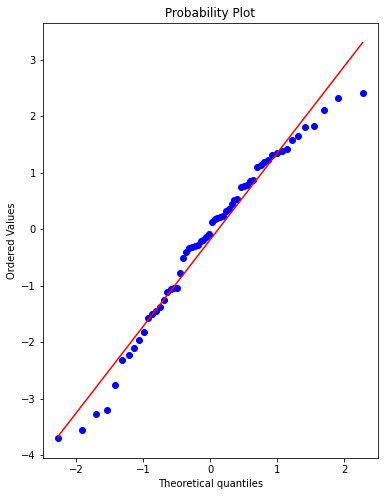

In [42]:
fig , ax = plt.subplots(figsize=(6,8))
sp.stats.probplot(test_residuals,plot=ax)

In [43]:
from joblib import dump,load

In [53]:
campaign = [[148,22,12]]
z=model.predict(campaign)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


z

In [54]:
print(z)

[13.84726735]
